# Data Pre-Processing

Want to see if each data set contains the seqn number and data release number

In [1]:
import os
import pandas as pd

data_master = "ICPSR_25504\\"
dataframes = []
index = []
i = 0

os.listdir(data_master)
for root, dirs, files in os.walk(data_master):
    for name in files:
        if name.endswith(".tsv"):
            file = os.path.join(root, name)
            dataframes.append(pd.read_csv(file, sep = "\t", nrows = 100))
            index.append(root[-6:])

dataframes = pd.Series(dataframes, index = index)


FileNotFoundError: [Errno 2] No such file or directory: 'ICPSR_25504\\'

In [2]:
num_seqn = 0
num_SDDSRVYR = 0

for i in dataframes.index:
    df = dataframes[i]
    
    if "SEQN" in df.columns:
        num_seqn +=1
    else:
        print(i)
    if "SDDSRVYR" in df.columns:
        num_SDDSRVYR += 1
    else:
        print(i)

DS0214
DS0214
DS0215
DS0215
DS0216
DS0216
DS0235
DS0235


In [3]:
print(num_seqn/len(dataframes))
print(num_SDDSRVYR/len(dataframes))

0.963302752293578
0.963302752293578


Some dataframes don't contain the Serial Number and the Data Release Number. Let's investigate why this occurs. 

## DS0214
Dietary Supplement Use -- Supplement Information

This data set stores dietary supplement information.
The primary key to this dataset is the Supplement ID number. Let's see if this is a foreign key in another dataset

In [4]:
for i in dataframes.index:
    df = dataframes[i]
    
    if "DSDSUPID" in df.columns:
        print(i)

DS0213
DS0214
DS0215


The Supplement ID number (DSDSUPID) is the primary key in DS0214 and is a foreign key in DS0213

DS0213 is a dataset that contains the serial number and the data release number.
DSO213 is Dietary Supplement Use -- Participants Use of Supplement
Let's see how DSO213 is structured: Can one person be recorded taking multiple supplements? If so, what is the distribution of supplement usage in the same?

In [5]:
DS2013 = pd.read_csv("ICPSR_25504\\DS0213\\25504-0213-Data.tsv", sep = "\t")
supplement_usage = DS2013.groupby("SEQN").size().sort_values(ascending = False).reset_index(name="Count")
supplement_usage

,SEQN,Count
0,34656,20
1,40551,19
2,37134,16
3,38637,16
4,37164,14
...,...,...
4105,35518,1
4106,35522,1
4107,35524,1
4108,35525,1


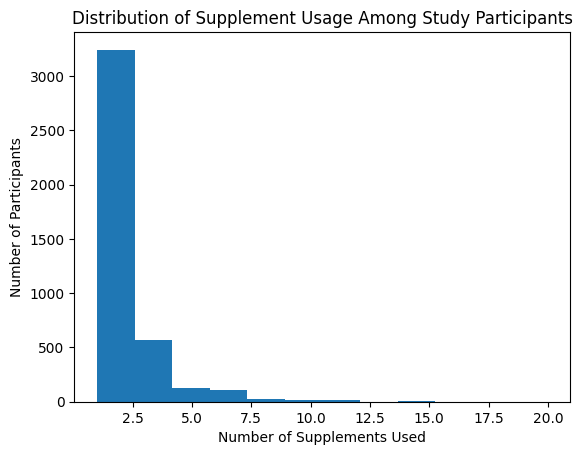

In [6]:
import matplotlib.pyplot as plt
plt.hist(supplement_usage["Count"], bins = 12)
plt.xlabel("Number of Supplements Used")
plt.ylabel("Number of Participants")
plt.title("Distribution of Supplement Usage Among Study Participants")
plt.show()

A key thing to note is that a participant who is not using supplements is not included in this visualization. This analysis is only representative of a participant that uses one or multiple supplement(s)

Let's look at the next dataset that does not contain the sequence number or data release number

## DS0215
Dietary Supplement Use -- Ingredient Information

The Supplement ID number (DSDSUPID) is also the primary key in DS0214 and is a foreign key in DS0213

Can a supplement have several ingredients and what is the distributions of number ingredients in a supplements

In [7]:
DS2015 = pd.read_csv("ICPSR_25504\\DS0215\\25504-0215-Data.tsv", sep = "\t")
num_ingredients = DS2015.groupby("DSDSUPP").size().sort_values(ascending = False).reset_index(name="Count")
num_ingredients

,DSDSUPP,Count
0,S1000579801,68
1,S1000579800,65
2,S1000580200,65
3,S1000600500,65
4,S1000582500,64
...,...,...
2138,S1000649000,1
2139,S1000649100,1
2140,S1000649200,1
2141,S1000649300,1


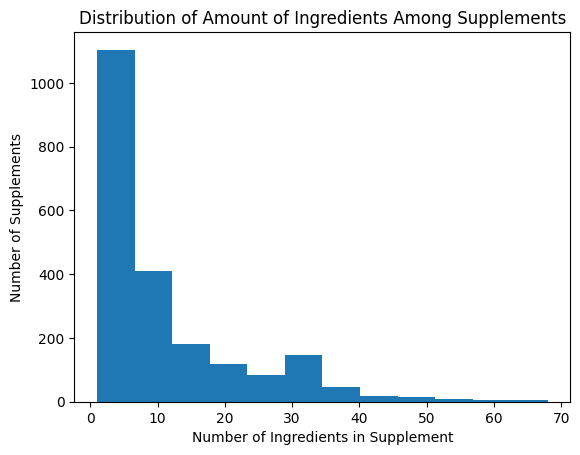

In [8]:
import matplotlib.pyplot as plt
plt.hist(num_ingredients["Count"], bins = 12)
plt.xlabel("Number of Ingredients in Supplement")
plt.ylabel("Number of Supplements")
plt.title("Distribution of Amount of Ingredients Among Supplements")
plt.show()

In [9]:
DS2015[DS2015["DSDSUPP"]=="S1000579801"]

,DSDSUPID,DSDSUPP,DSDINGID,DSDINGR,DSDOPER,DSDQTY,DSDUNIT,DSDCAT,DSDBLFLG
11661,1000579801,S1000579801,10000037,I10000037,=,100.0,1,4,2
11662,1000579801,S1000579801,10000038,I10000038,=,50.0,1,4,2
11663,1000579801,S1000579801,10000042,I10000042,=,150.0,4,1,2
11664,1000579801,S1000579801,10000052,I10000052,=,1.5,1,2,2
11665,1000579801,S1000579801,10000070,I10000070,=,250.0,1,2,2
...,...,...,...,...,...,...,...,...,...
11724,1000579801,S1000579801,10004592,I10004592,=,400.0,1,4,2
11725,1000579801,S1000579801,10004593,I10004593,=,100.0,1,4,2
11726,1000579801,S1000579801,10004595,I10004595,=,100.0,1,4,2
11727,1000579801,S1000579801,10004927,I10004927,=,15.0,1,3,2


## DS0216
Dietary Supplement Use -- Supplement Blend

The primary key in DS0216 is the Ingredient ID number which is a foreign key in DS0215


## DS0235
Drug Information

The primary key for DS0235 is the Generic Drug Code (RXDDRGID). Let's find which dataset has the generic drug code as a foreign key.

In [10]:
for i in dataframes.index:
    df = dataframes[i]
    
    if "RXDDRGID" in df.columns:
        print(i)

DS0234
DS0235


DS0234 contains RXDDRGID as a foreign key. This dataset is Prescription Medications

In [12]:
DS2034 = pd.read_csv("ICPSR_25504\\DS0234\\25504-0234-Data.tsv", sep = "\t")
num_drugs = DS2034.groupby("SEQN").size().sort_values(ascending = False).reset_index(name="Count")
num_drugs

C:\Users\gmandl\AppData\Local\Temp\ipykernel_13536\4042134377.py:1: DtypeWarning: Columns (35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  DS2034 = pd.read_csv("ICPSR_25504\\DS0234\\25504-0234-Data.tsv", sep = "\t")


,SEQN,Count
0,41025,20
1,34531,18
2,34423,17
3,38612,16
4,33959,16
...,...,...
10343,34985,1
10344,34984,1
10345,34983,1
10346,34982,1


In [13]:
# Partipicant 41025 uses 20 perscription drugs
DS2034[DS2034["SEQN"] == 41025]

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDCOUNT,SDDSRVYR,RIDSTATR,RIDEXMON,...,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
17125,41025,1,ACETAMINOPHEN; HYDROCODONE,d03428,1,1825,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17126,41025,1,AZELASTINE NASAL,d04068,1,182,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17127,41025,1,BUSPIRONE,d00182,1,122,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17128,41025,1,CHOLESTYRAMINE,d00193,1,547,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17129,41025,1,CITALOPRAM,d04332,1,243,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17130,41025,1,DILTIAZEM,d00045,1,365,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17131,41025,1,ESOMEPRAZOLE,d04749,1,730,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17132,41025,1,FLUTICASONE,d01296,1,1825,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17133,41025,1,FLUTICASONE; SALMETEROL,d04611,1,1095,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47
17134,41025,1,GABAPENTIN,d03182,1,730,20,4,2,2,...,2,2,1,2,2,1,98473.732756,100919.498403,2,47


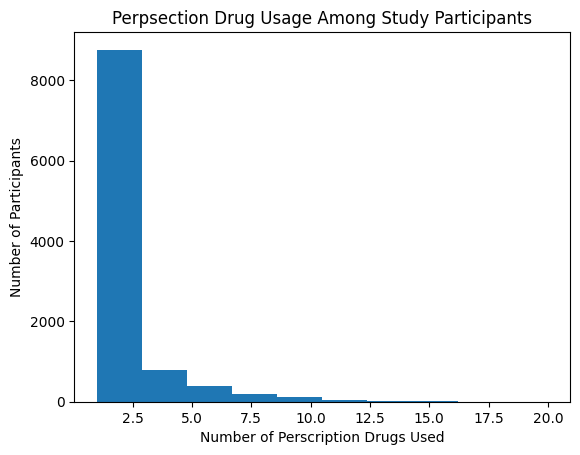

In [14]:
import matplotlib.pyplot as plt
plt.hist(num_drugs["Count"], bins = 10)
plt.xlabel("Number of Perscription Drugs Used")
plt.ylabel("Number of Participants")
plt.title("Perpsection Drug Usage Among Study Participants")
plt.show()

## Year to Year Survey Data Consistency

The first data that we have been working with from the dataset ICPSR_25504 is the National Health and Nutrition Examination Survey (NHANES) from 2005-2006. Next we have downloaded the Survey from 2005-2006 and we will look to see if the data architecture is consistent across year. 

First let's check if each data set exists in both surveys and if their columns are the same


In [15]:
import os
import pandas as pd

data_master = "ICPSR_25505\\"
dataframes2 = []
index2 = []
i = 0

os.listdir(data_master)
for root, dirs, files in os.walk(data_master):
    for name in files:
        if name.endswith(".tsv"):
            file = os.path.join(root, name)
            dataframes2.append(pd.read_csv(file, sep = "\t", nrows = 100))
            index2.append(root[-6:])

dataframes2 = pd.Series(dataframes2, index = index2)


In [16]:
print("Datasets included in 2005-2006 but not in 2007-2008")
for i in index:
    if i not in index2:
        print(i)


print("Datasets not included in 2005-2006 but in 2007-2008")
for i in index2:
    if i not in index:
        print(i)

print("Datasets with mismatching columns")
for i in index:
    if i in index2:
        if len(dataframes[i].columns) != len(dataframes2[i].columns):
            print(i)
        
print("Datasets with consistent number of columns")
for i in index:
    if i in index2:
        if len(dataframes[i].columns) == len(dataframes2[i].columns):
            print(i)
        

Datasets included in 2005-2006 but not in 2007-2008
DS0018
DS0019
DS0020
DS0021
DS0022
DS0023
DS0024
DS0025
DS0026
DS0128
DS0129
DS0130
DS0131
DS0132
DS0133
DS0134
DS0135
DS0136
DS0137
DS0138
DS0139
DS0140
DS0141
DS0142
DS0143
DS0144
DS0234
DS0235
DS0236
DS0237
DS0238
DS0239
DS0240
DS0241
DS0242
DS0243
DS0244
DS0245
DS0246
DS0247
DS0248
Datasets not included in 2005-2006 but in 2007-2008
DS0100
Datasets with mismatching columns
DS0011
DS0012
DS0013
DS0014
DS0015
DS0016
DS0017
DS0101
DS0102
DS0103
DS0104
DS0105
DS0106
DS0107
DS0108
DS0109
DS0110
DS0111
DS0113
DS0114
DS0115
DS0116
DS0117
DS0118
DS0119
DS0120
DS0121
DS0122
DS0123
DS0124
DS0125
DS0126
DS0127
DS0203
DS0204
DS0206
DS0207
DS0208
DS0209
DS0210
DS0211
DS0212
DS0214
DS0215
DS0216
DS0217
DS0218
DS0219
DS0220
DS0221
DS0222
DS0223
DS0224
DS0225
DS0226
DS0227
DS0228
DS0229
DS0230
DS0231
DS0232
DS0233
Datasets with consistent number of columns
DS0001
DS0112
DS0201
DS0202
DS0205
DS0213


In [17]:
name = "DS0001"
i=0

while i < len(dataframes[name].columns):
    if dataframes[name].columns[i] in dataframes2[name].columns:
        i += 1
    else:
        break

if i == len(dataframes[name].columns):
    print("True")
else:
    print("False")

False


In [18]:
dataframes[name].columns,dataframes2[name].columns

(Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR',
        'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1', 'DMQMILIT', 'DMDBORN', 'DMDCITZN',
        'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDSCHOL', 'DMDMARTL', 'DMDHHSIZ',
        'DMDFMSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG', 'DMDHRGND',
        'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'SIALANG',
        'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG',
        'MIAPROXY', 'MIAINTRP', 'AIALANG', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU',
        'SDMVSTRA'],
       dtype='object'),
 Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR',
        'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1', 'DMQMILIT', 'DMDBORN2', 'DMDCITZN',
        'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDSCHOL', 'DMDMARTL', 'DMDHHSIZ',
        'DMDFMSIZ', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'RIDEXPRG', 'DMDHRGND',
        'DMDHRAGE', 'DMDHRBR2', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'SIALANG',
        'S

Columns are almost identical aside from DMDBORN and DMDBORN2

Let's see how many participants we have from both surveys

In [19]:
ICPSR_25504 = pd.read_csv("ICPSR_25504\\DS0001\\25504-0001-Data.tsv", sep = "\t")
ICPSR_25505 = pd.read_csv("ICPSR_25505\\DS0001\\25505-0001-Data.tsv", sep = "\t")
ICPSR_25504["SEQN"].apply(lambda x: x in ICPSR_25505["SEQN"].values).sum()

0

There is no way of identifying previous participants in new surverys. 
There also seems to be little value in analyzing multiple surveys because we can't create variables that look at year to year changes in the same patient and the data architecture is not consistent across years. 
The only potential uses of having surveys from different years is to see if a model built on data from one year generalizes to the survey data from other years. In order to do some we must choose variables and datasets that exist in all surveys. 

## Joining Datasets

In [20]:
import pandas as pd
DS0132= pd.read_csv("ICPSR_25504\\DS0132\\25504-0132-Data.tsv", sep = "\t")
DS0123 = pd.read_csv("ICPSR_25504\\DS0123\\25504-0123-Data.tsv", sep = "\t")
joined = DS0132.set_index("SEQN").join(DS0123.set_index("SEQN"), lsuffix="_DS0132", rsuffix="_DS0123")

In [21]:
joined

,WTSAF2YR_DS0132,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBXAPB,LBDAPBSI,SDDSRVYR_DS0132,RIDSTATR_DS0132,RIDEXMON_DS0132,...,FIAPROXY_DS0123,FIAINTRP_DS0123,MIALANG_DS0123,MIAPROXY_DS0123,MIAINTRP_DS0123,AIALANG_DS0123,WTINT2YR_DS0123,WTMEC2YR_DS0123,SDMVPSU_DS0123,SDMVSTRA_DS0123
SEQN,,,,,,,,,,,,,,,,,,,,,
31130,0.000,,,,,,,4,2,2,...,2,2,,,,,29960.839509,34030.994786,2,46
31131,67556.810,86,.971,49,1.267,50,.5,4,2,2,...,2,2,1,2,2,1,26457.708180,26770.584605,1,48
31132,80193.962,65,.734,75,1.94,75,.75,4,2,2,...,2,2,1,2,2,1,32961.509920,35315.538900,2,52
31133,15668.017,61,.689,81,2.095,75,.75,4,2,2,...,2,2,1,2,2,1,5635.221296,5920.617679,1,51
31134,93399.539,195,2.202,98,2.534,111,1.11,4,2,2,...,2,2,1,2,2,1,43718.506372,44231.167252,2,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41465,21859.428,81,.914,96,2.483,84,.84,4,2,1,...,2,2,1,2,2,1,6659.491266,6975.174925,1,49
41467,8000.729,69,.779,80,2.069,75,.75,4,2,2,...,2,2,1,2,2,1,3623.884248,3780.835721,2,56
41471,16274.316,89,1.005,72,1.862,60,.6,4,2,1,...,2,2,1,2,2,1,6283.305550,6602.173657,1,52


Let's see if the columns that occur in both dataframes are redundant

In [22]:
(joined["AIALANG_DS0123"] == joined["AIALANG_DS0132"]).mean()
# AIALANG is definitely redundant

1.0

In [23]:
DS1 = "DS0123"
DS2 = "DS0132"

n = 0
total = 0
for column in joined.columns:

    if "_" in column:
        total +=1
        original = column.split("_")[0]
        n1 = original + "_" + DS1
        n2 = original + "_" + DS2

        if (joined[n1]==joined[n2]).mean() == 1:
            n += 1
            joined.drop(n2, axis = 1)

print(str(n/total) + " of the columns that occur in both datasets are redundant")
        

1.0 of the columns that occur in both datasets are redundant


In [29]:
import os
import pandas as pd

data_master = "ICPSR_25504\\"
i = 0
joined_master = DS0123.set_index("SEQN")

for root, dirs, files in os.walk(data_master):
    for name in files:
        if name.endswith(".tsv"):
            file = os.path.join(root, name)
            df = pd.read_csv(file, sep = "\t")
            if "SEQN" not in df.columns:
                continue
            name = root[-6:]
        
            new_columns = df.columns.difference(joined_master.columns)
            # try:
            joined_master = joined_master.join(df.loc[:,new_columns].set_index("SEQN"),how="left",lsuffix="_master", rsuffix="_"+name)
            # except:
            #     print(name)
            # n = 0
            # total = 0
            # for column in joined_master.columns:
            #     if "_" in column:
            #         print(column, name)
            #         total +=1
            #         original = column.split("_")[0]
            #         n1 = original + "_master"
            #         n2 = original + "_" + name

            #         if n2 not in joined_master.columns:
            #             continue

            #         if (joined_master[n1]==joined_master[n2]).mean() == 1:
            #             n += 1
            #             joined_master.drop(n2, axis = 1)
            #             joined_master.rename({n1:original})        
            # if n/total != 1:
            #     print(name + " - not redundant")
            

C:\Users\gmandl\AppData\Local\Temp\ipykernel_13536\3300001926.py:12: DtypeWarning: Columns (55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep = "\t")
C:\Users\gmandl\AppData\Local\Temp\ipykernel_13536\3300001926.py:12: DtypeWarning: Columns (56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep = "\t")
C:\Users\gmandl\AppData\Local\Temp\ipykernel_13536\3300001926.py:12: DtypeWarning: Columns (111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep = "\t")
C:\Users\gmandl\AppData\Local\Temp\ipykernel_13536\3300001926.py:12: DtypeWarning: Columns (15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,101,102,111,112,113,114,115,116) have mixed types. Specify dtype opt

MemoryError: Unable to allocate 1.30 GiB for an array with shape (222, 786976) and data type float64

In [30]:
joined_master

,WTSAF2YR,LBXGLU,LBDGLUSI,LBXIN,LBDINSI,PHAFSTHR,PHAFSTMN,SDDSRVYR,RIDSTATR,RIDEXMON,...,DXXNKBMD,DXXOFA,DXXOFBMC,DXXOFBMD,DXXTRA,DXXTRBMC,DXXTRBMD,DXXWDA,DXXWDBMC,DXXWDBMD
SEQN,,,,,,,,,,,,,,,,,,,,,
31130,0.000,,,,,10,3,4,2,2,...,,,,,,,,,,
31131,67556.810,90,4.996,10.03,60.18,14,9,4,2,2,...,,,,,,,,,,
31131,67556.810,90,4.996,10.03,60.18,14,9,4,2,2,...,,,,,,,,,,
31131,67556.810,90,4.996,10.03,60.18,14,9,4,2,2,...,,,,,,,,,,
31131,67556.810,90,4.996,10.03,60.18,14,9,4,2,2,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41474,17122.983,93,5.162,20.12,120.72,9,39,4,2,2,...,.825,38.34,30.73,.802,12.1,6.63,.548,1.3,.96,.736
41474,17122.983,93,5.162,20.12,120.72,9,39,4,2,2,...,.825,38.34,30.73,.802,12.1,6.63,.548,1.3,.96,.736
41474,17122.983,93,5.162,20.12,120.72,9,39,4,2,2,...,.825,38.34,30.73,.802,12.1,6.63,.548,1.3,.96,.736


In [ ]:
# The data is far too large to combine into one so I will choose critical datasets to focus the analysis on


## DS209 - Depression Screener

This data set is a Questionnaire with 10 questions about depressive symptoms (Eg. Thought you would be better off dead.) The response are categorical from 0-3 with 0 being non-depressive behaviour (Not at all) and 4 being depressive behaviour (Nearly every day).

We will create a target variable that aggregate the results of these questions, taking the mean response of the questions which scores a participants depressive state. 0 meaning low, 4 high

The respondant can answer a question as "Don't know" and will be assigned the number 9 which can throw off our scores. I will remove these values from the average calculations. So for example, if a respondant answers "Don't know" for 2 questions, their score will be the average of their repsonses to the other 8 questions. 

In [74]:
DS209= pd.read_csv("25504-0209-Data.tsv", sep = "\t")

In [61]:
DS209.dtypes

SEQN          int64
DPQ010       object
DPQ020       object
DPQ030       object
DPQ040       object
DPQ050       object
DPQ060       object
DPQ070       object
DPQ080       object
DPQ090       object
DPQ100       object
SDDSRVYR      int64
RIDSTATR      int64
RIDEXMON      int64
RIAGENDR      int64
RIDAGEYR      int64
RIDAGEMN     object
RIDAGEEX     object
RIDRETH1      int64
DMQMILIT      int64
DMDBORN       int64
DMDCITZN      int64
DMDYRSUS     object
DMDEDUC3     object
DMDEDUC2     object
DMDSCHOL     object
DMDMARTL      int64
DMDHHSIZ      int64
DMDFMSIZ      int64
INDHHINC     object
INDFMINC     object
INDFMPIR     object
RIDEXPRG     object
DMDHRGND      int64
DMDHRAGE      int64
DMDHRBRN     object
DMDHREDU     object
DMDHRMAR     object
DMDHSEDU     object
SIALANG      object
SIAPROXY     object
SIAINTRP     object
FIALANG      object
FIAPROXY     object
FIAINTRP     object
MIALANG      object
MIAPROXY     object
MIAINTRP     object
AIALANG      object
WTINT2YR    float64


We need to turn some columns into integer

In [75]:
import numpy as np
DS209 = DS209.replace(" ", np.NaN )

In [79]:
DS209[DS209.columns[1:11]]
convert_dict = {}
for column in DS209.columns[1:11]:
    DS209[column] = pd.to_numeric(DS209[column], errors='coerce')
print(DS209.dtypes)

SEQN          int64
DPQ010      float64
DPQ020      float64
DPQ030      float64
DPQ040      float64
DPQ050      float64
DPQ060      float64
DPQ070      float64
DPQ080      float64
DPQ090      float64
DPQ100      float64
SDDSRVYR      int64
RIDSTATR      int64
RIDEXMON      int64
RIAGENDR      int64
RIDAGEYR      int64
RIDAGEMN     object
RIDAGEEX     object
RIDRETH1      int64
DMQMILIT      int64
DMDBORN       int64
DMDCITZN      int64
DMDYRSUS     object
DMDEDUC3     object
DMDEDUC2     object
DMDSCHOL     object
DMDMARTL      int64
DMDHHSIZ      int64
DMDFMSIZ      int64
INDHHINC     object
INDFMINC     object
INDFMPIR     object
RIDEXPRG     object
DMDHRGND      int64
DMDHRAGE      int64
DMDHRBRN     object
DMDHREDU     object
DMDHRMAR     object
DMDHSEDU     object
SIALANG      object
SIAPROXY     object
SIAINTRP     object
FIALANG      object
FIAPROXY     object
FIAINTRP     object
MIALANG      object
MIAPROXY     object
MIAINTRP     object
AIALANG      object
WTINT2YR    float64


In [82]:
(DS209.iloc[:, 1:11].isna().mean(axis = 1) == 1).sum()

498

498 participants did not respond at all.
Let's remove these from the dataset


In [99]:
clean = DS209[DS209.iloc[:, 1:11].isnull().mean(axis = 1) != 1]

In [100]:
depression_score = clean.iloc[:, 1:11].mean(axis = 1)

In [103]:
final = pd.concat([clean, depression_score], axis = 1).rename(columns = {0:"DepressionScore"}).set_index("SEQN")

## Distribution of target variable

In [114]:
final["DepressionScore"].describe()

count    4836.000000
mean        0.306493
std         0.437908
min         0.000000
25%         0.000000
50%         0.100000
75%         0.400000
max         4.900000
Name: DepressionScore, dtype: float64

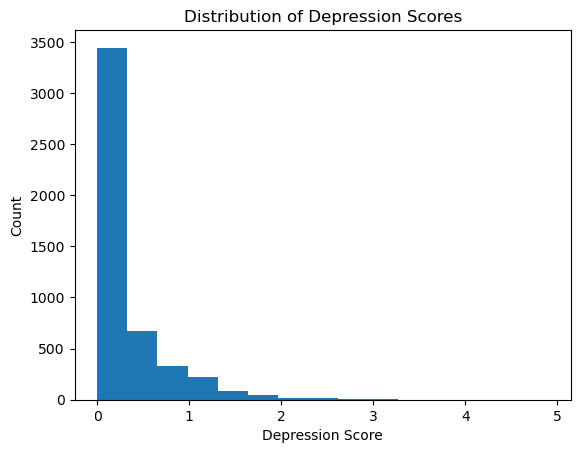

In [123]:
import matplotlib.pyplot as plt
from math import log

plt.hist(final["DepressionScore"], bins = 15)
plt.title("Distribution of Depression Scores")
plt.xlabel("Depression Score")
plt.ylabel("Count")
plt.show()

In [126]:
final.to_csv("depression_table.csv")